In [1]:
cd ~/work/home/feser/work/ocaml-workspace/staged-synth/runs/2022-07-02-17:48:43

/home/jovyan/work/mnt/scratch/metric-synth-runs/2022-07-02-17:48:43


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from shared import load, plot_ablations

In [3]:
df = load('.')

100%|█████████████████████████████████████████████| 21036/21036 [00:08<00:00, 2590.38it/s]


In [6]:
df

,method,bench,max_cost,n_groups,threshold,success,runtime,program_size,timeout,local_search_steps,filename,backward_pass_repeats,extract,repair,rank
120,metric,1,20,200,0.3,True,0.025787,4.0,0.0,100,metric-regex-repairrandom-77.json,10,Greedy,Random,True
466,metric,1,20,200,0.3,True,0.030527,4.0,0.0,100,metric-regex-repairrandom-107.json,10,Greedy,Random,True
675,metric,1,20,200,0.0,True,0.063468,4.0,0.0,100,metric-regex-nocluster-94.json,10,Greedy,Guided,True
799,metric,1,20,200,0.3,True,0.164905,6.0,0.0,100,metric-regex-repairrandom-72.json,10,Greedy,Random,True
906,metric,1,20,200,0.3,True,0.579893,17.0,0.0,100,metric-regex-norank-108.json,10,Greedy,Guided,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9670,metric,97,20,200,0.3,True,1.746488,23.0,0.0,100,metric-regex-norank-3383.json,10,Greedy,Guided,False
9804,metric,97,20,200,0.3,True,0.016488,4.0,0.0,100,metric-regex-repairrandom-3317.json,10,Greedy,Random,True
9889,metric,97,20,200,0.3,True,0.017895,4.0,0.0,100,metric-regex-standard-3345.json,10,Greedy,Guided,True
9920,metric,97,20,200,0.3,True,5.254013,20.0,0.0,100,metric-regex-standard-3410.json,10,Greedy,Guided,True


In [7]:
df.groupby(['n_groups', 'threshold', 'max_cost', 'extract', 'repair', 'rank']).agg({'success':['mean','count'], 
                                                       'runtime':['min', 'median', 'max'],
                                                       'program_size':['min', 'median', 'max']})

success         runtime  \
                                                      mean count       min   
n_groups threshold max_cost extract repair rank                              
200      0.0       20       Greedy  Guided True   0.720472  2032  0.000893   
         0.3       20       Greedy  Guided False  0.547244  2032  0.104131   
                                           True   0.753937  2032  0.000916   
                                    Random True   0.718996  2032  0.000911   
                            Random  Guided True   0.733268  2032  0.000922   

                                                                        \
                                                    median         max   
n_groups threshold max_cost extract repair rank                          
200      0.0       20       Greedy  Guided True   1.495756  238.373781   
         0.3       20       Greedy  Guided False  0.713270  233.712903   
                                           True   0.744485  271.363729   
                                    Random True   0.677884  270.878702   
                            Random  Guided True   0.705070  273.855294   

                                                 program_size                
                                                          min median    max  
n_groups threshold max_cost extract repair rank                              
200      0.0       20       Greedy  Guided True           2.0   22.0   97.0  
         0.3       20       Greedy  Guided False          2.0   27.0   76.0  
                                           True           2.0   19.0  109.0  
                                    Random True           2.0   19.0  109.0  
                            Random  Guided True           2.0   20.0  109.0

In [4]:
n_bench = 2174

<Figure size 432x288 with 0 Axes>

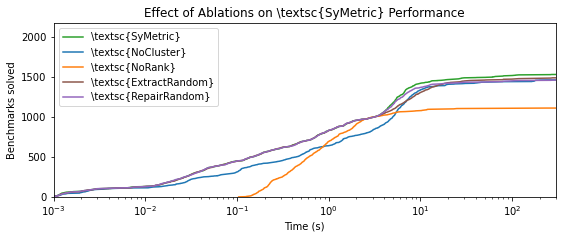

In [5]:
ax = plot_ablations(df)
ax.set_ylim([0, n_bench + 1])
ax.set_xlim([1e-3, 300])
ax.set_xscale("log")
plt.legend(loc="upper left")
plt.show()

<Figure size 432x288 with 0 Axes>

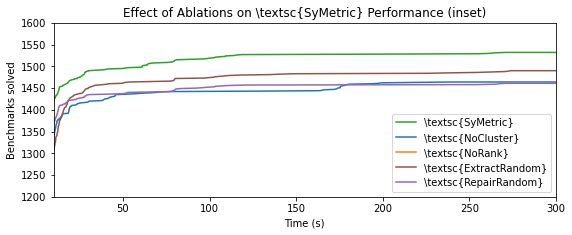

In [7]:
ax = plot_ablations(df)
ax.set_title(r"Effect of Ablations on \textsc{SyMetric} Performance (inset)")
ax.set_ylim([1200, 1600])
ax.set_xlim([1e1, 300])
plt.legend(loc="lower right")
plt.show()